In [62]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [63]:
csv_path = './3_sensitivity/superblksize.csv'
workload_list = ['mix1', 'mix2', 'mix3', 'mix4']
sbsize_scheme_list = ['2 Performance', '4 Performance', '8 Performance', '16 Performance']
workload_dict = {item: item for item in workload_list}
sbsize_scheme_dict = {
    '2 Performance': '2',
    '4 Performance': '4',
    '8 Performance': '8 (Baryon)',
    '16 Performance': '16',
}

sbsize_title = 'Normalized Speedup'
sbsize_name = 'graph_superblksize'
sbsize_ylim = (0, 1.3)
sbsize_yticks = list(np.arange(sbsize_ylim[0], sbsize_ylim[1]+0.01, 0.2))
sbsize_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [4, 5, 0, 3]]
assert len(sbsize_bar_colors) == len(scheme_dict)

# pprint(sbsize_yticks)

In [64]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [65]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
sbsize_xlabels = []
sbsize_xticks = []
sbsize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        sbsize_data_2darr.append(row_value)
        sbsize_xlabels.append(workload_fullname)
        xtick += 1
        sbsize_xticks.append(xtick)
assert len(sbsize_data_2darr) == len(sbsize_xlabels) == len(sbsize_xticks)

pprint(sbsize_data_2darr)

[[0.7746478873, 0.9090909091, 1.0, 1.145833333],
 [0.9593495934999999, 0.9752066116, 1.0, 0.9752066116],
 [0.8213483145999999, 0.8744019139, 1.0, 1.020949721],
 [0.8104089219, 0.9276595745, 1.0, 1.023474178]]


10.0


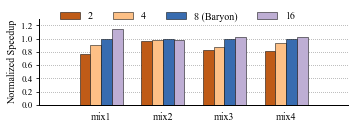

In [66]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

h = easypyplot.barchart.draw(
    ax, fig_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=fig_xlabels,
    xticks=fig_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    prop=ft,
    colors=fig_bar_colors)

''' x axis '''
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.set_xticks(fig_xticks)
ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)

''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
ax.set_ylabel(fig_title, multialignment='center', fontproperties=ft)

''' values on top of each bar '''
# for group_id in range(len(workload_dict)):
#     for entry_id in range(len(scheme_dict)):
#         bar_value = fig_data_2darr[group_id][entry_id]
#         bar_x = ax.get_xticks()[group_id] + fig_bar_width / len(scheme_dict) * (entry_id - len(scheme_dict) / 2)
#         bar_text = str('{:.2f}'.format(bar_value))
#         ax.text(bar_x, bar_value + 0.1, bar_text, ha='left', va='top',
#                 fontsize=fig_label_fontsize,
#                 # rotation=90,
#                 fontproperties=ft,
#                 )

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='upper center', bbox_to_anchor=(0.5, 1.05),
        ncol=4, frameon=False, prop=ft)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.8)

In [67]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures